# Imports

Alle nodige imports voor het volledige document.

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

#Methodes


**Gegevens**

In [ ]:
#excel bestand inlezen en data returnen
def read_excel(filename):
  return pd.ExcelFile(filename)

#tabel maken van yearly tablad en returnen
def getYearly(filename):
  data = pd.read_excel(read_excel(filename), "Yearly")
  data["Category"] = data["Category"].str.strip()
  return data

#tabel maken van quarterly tablad en returnen
def getQuarterly(filename):
  data = pd.read_excel(read_excel(filename), "Quarterly") 
  data["Category"] = data["Category"].str.strip()
  return data

#tabel maken van monthly tablad en returnen
def getMonthly(filename):
  data = pd.read_excel(read_excel(filename), "Monthly")
  data["Category"] = data["Category"].str.strip()
  return data

#tabel maken van other tablad en returnen
def getOther(filename):
  data = pd.read_excel(read_excel(filename), "Other")
  data["Category"] = data["Category"].str.strip()
  return data

**Data per categorie**

In [ ]:
#van het tablad yearly de data van een gevraagde category returnen
def get_categoryValues_yearly(category):
  dataYearly = getYearly("data_export_timeseries.xlsx")
  dataYearly = dataYearly.loc[dataYearly["Category"]==category]
  return dataYearly

#van het tablad quarterly de data van een gevraagde category returnen
def get_categoryValues_quarterly(category):
  dataQuarterly = getQuarterly("data_export_timeseries.xlsx")
  dataQuarterly = dataQuarterly.loc[dataQuarterly["Category"]==category]
  return dataQuarterly

#van het tablad monthly de data van een gevraagde category returnen
def get_catergoryValues_Montly(category):
  dataMonthly = getMonthly("data_export_timeseries.xlsx")
  dataMonthly = dataMonthly.loc[dataMonthly["Category"]==category]
  return dataMonthly

#van het tablad other de data van een gevraagde category returnen
def get_categoryValues_Other(category):
  dataOther = getOther("data_export_timeseries.xlsx")
  dataOther = dataOther.loc[dataOther["Category"]==category]
  return dataOther

**Lineare regressie**

In [ ]:
#voorspelt data aan de hand van de begin data en de waarde waarmee het stijgt per meting
def predict_data(start_data, increase, measurement):
  return start_data + increase * (measurement-1)

In [ ]:
#past de increase aan met behulp van voorspellende data
def delta_trick(start_data, increase, measurement, predicted_data , learning_rate):
  increase += learning_rate * (predicted_data - predict_data(start_data, increase, measurement))
  return increase

In [ ]:
#algoritme om de waarde the schatten waarmee de data verandert per meting
def simple_algorithm(data, num_epochs, learning_rate=0.01):
  start_data = data[0]
  increase = random.random()
  for i in range(num_epochs):
    j = random.randint(0,len(data)-1)
    measurement = np.arange(1,len(data)+1)[j]
    predicted_data = data[j]
    increase = delta_trick(start_data, increase, measurement, predicted_data , learning_rate)
  return increase

**Lineare regressie, per bedrijf**

In [ ]:
#de data opschonen door de spaties en de N te verwijderen
def cleanSeries(data):
  data["Series"]=data["Series"].str.replace("N","").str.strip()
  return data

#data opvragen en returnen van een specifiek bedrijf
def getBedrijfDataId(id, data):
  #zoeken in welk tablad het gevraagde id zich bevind en de data opvragen
  cleanYearlyData=cleanSeries(getYearly(data))
  cleanQuarterlyData=cleanSeries(getQuarterly(data))
  cleanMonthlyData=cleanSeries(getMonthly(data))
  if id in cleanYearlyData["Series"].values:
    data = cleanYearlyData.loc[cleanYearlyData["Series"]==id]
  elif id in cleanQuarterlyData["Series"].values:
    data = cleanQuarterlyData.loc[cleanQuarterlyData["Series"]==id]
  elif id in cleanMonthlyData["Series"].values:
    data = cleanMonthlyData.loc[cleanMonthlyData["Series"]==id]
  else:
    return 0

  dataSize = data.size
  data = data[data.columns[6:dataSize]]
  data = data.values.tolist()[0]
  return [x for x in data if str(x) != 'nan']

**Plot gemiddelde cijfers per categorie**

In [ ]:
#lengte van de tabel opvragen
def get_N(dataYearly):
  return int(dataYearly["N"].head(1))

#per kolom het gemiddelde van de gegevens berekenen, toevoegen aan een array en dan deze array returnen
def get_gem_category_yearly(dataYearly,n):
  arr_gem_yearly = []
  for i in range(1,n):
    gem = dataYearly[i].mean()
    arr_gem_yearly.append(gem)
  return arr_gem_yearly

**Plot maken van gevraagd bedrijf (Cijfers in functie van tijd)**

In [ ]:
#plot maken van de gegevens van een gevraagd bedrijf en het plot returnen
def plot_cijfers_van_bedrijf (id, filename):
  data = getBedrijfDataId(id, filename)
  x= np.arange(1,len(data)+1)
  y= data
  return plt.scatter(x,y)

# Plot gemiddelde cijfers per categorie (test)


In [ ]:
category = input("Geef een categorie op: ")
dataYearly = get_categoryValues_yearly(category)
n = int(get_N(dataYearly))
dataCategory = get_gem_category_yearly(dataYearly,n)
print(dataCategory)

Geef een categorie op: MICRO
[1952.920610687023, 2141.9101526717554, 2386.2825954198483, 2685.177328244276, 3040.10603053435, 3379.187328244275, 3655.9977862595406, 3564.524732824427, 3749.514656488549, 4317.783129770992, 4352.384732824427, 4416.771297709924, 4959.468702290076, 5512.499694656488, 5805.13122137405, 5929.2808396946575, 5601.931908396945, 6030.090458015269, 6121.855801526718]


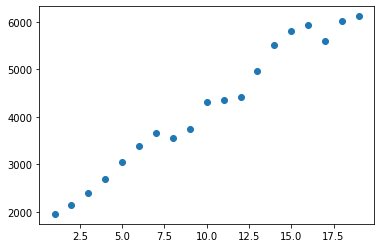

In [ ]:
x = np.arange(1,len(dataCategory)+1)
y = dataCategory
plt.scatter(x,y)


# Lineaire regressie per categorie (test)



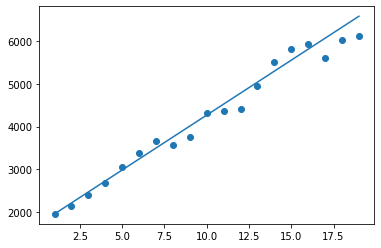

In [ ]:
x = np.arange(1,len(dataCategory)+1)
y = dataCategory
plt.scatter(x,y)
plt.plot(x,predict_data(dataCategory[0],simple_algorithm(dataCategory,10000),x))

# Lineaire regressie per bedrijf (test)

In [ ]:
dataBedrijf = getBedrijfDataId("16","data_export_timeseries.xlsx")
print(dataBedrijf)

[3149.1, 3393.8, 3756.3, 4058.4, 4600.58, 4886.0, 5224.69, 4802.58, 4872.4, 4980.1, 5863.9, 5514.6, 5868.0, 5875.89, 6658.3, 7101.4, 7375.8, 5748.3, 5915.4, 5759.3]


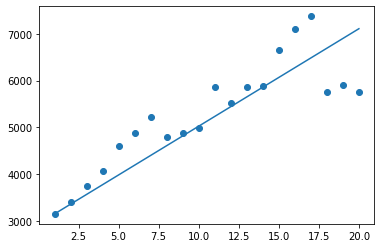

In [ ]:
x = np.arange(1,len(dataBedrijf)+1)
y = dataBedrijf
plt.scatter(x,y)
plt.plot(x,predict_data(dataBedrijf[0],simple_algorithm(dataBedrijf,10000),x))

# Plot data gevraagd bedrijf (test)

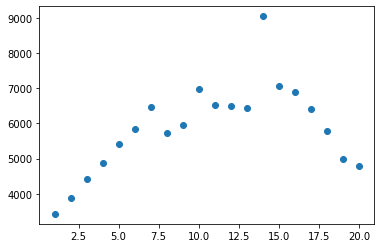

In [ ]:
plot_cijfers_van_bedrijf("18", "data_export_timeseries.xlsx")